# Dataset 1: Alzheimer Disease and Healthy Aging Data in US

#### 张恒顺 3120235193

In [1]:
import pandas as pd

### 读取数据

In [2]:
df = pd.read_csv('Alzheimer Disease and Healthy Aging Data In US.csv')

### 1. 数据摘要和可视化

#### 数据摘要

In [3]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

#### 简要分析
该数据集描述阿尔茨海默症和健康老龄化数据。该数据集包含以下类别：
<br>
* YearStart：数据收集开始的年份；
* YearEnd：数据收集结束的年份；
* LocationAbbr：收集数据的位置的缩写；
* LocationDesc：收集数据的位置的全名；
* Datasource：数据的来源；
* Class：数据的类别；
* Topic：数据的主题；
* Question：与数据相关的问题；
* Data_Value_Unit：数据值的度量单位；
* DataValueTypeID：数据值类型的 ID；
* Data_Value_Type：数据值的类型（例如平均值、百分比）；
* Data_Value：实际数据值；
* Data_Value_Alt：替代数据值（如果适用）；
* Low_Confidence_Limit：数据值置信区间的下限；
* High_Confidence_Limit：数据值置信区间的上限；
* Sample_Size：用于收集数据的样本大小；
* StratificationCategory1：用于分层的第一个类别（例如年龄组）；
* Stratification1：使用的具体分层（例如 18-24 岁）；
* StratificationCategory2：用于分层的第二个类别（如果适用）；
* Stratification2：用于第二类的特定分层（如果适用）；
* Geolocation：收集数据的位置的纬度和经度；
* ClassID：数据类的 ID；
* TopicID：数据主题的 ID；
* QuestionID：与数据相关的问题的 ID；
* LocationID：收集数据的位置的 ID；
* StratificationCategoryID1：用于分层的第一个类别的 ID；
* StratificationID1：用于第一个类别的特定分层的 ID；
* StratificationCategoryID2：用于分层的第二个类别的 ID；
* StratificationID2：用于第二个类别的特定分层的 ID。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

由此看出，有6个数值数据，23个标称数据。现在，对标称数据作频数统计。

In [5]:
object_columns = df.select_dtypes(include='object').columns
# 标称属性的频数统计
frequecy_list = [df[index].value_counts() for index in object_columns]
[print(frequecy) for frequecy in frequecy_list]

US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: LocationAbbr, dtype: int64
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                            4611
Oregon                             4565


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

统计数值数据的五数概括。

In [6]:
# 数值属性的5数概括
df.describe().loc[['min', '25%', '50%', '75%', 'max'], :]

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Sample_Size,LocationID
min,2015.0,2015.0,0.0,0.0,NaN,1.0
25%,2016.0,2016.0,15.3,15.3,NaN,18.0
50%,2017.0,2018.0,32.5,32.5,NaN,33.0
75%,2019.0,2019.0,56.8,56.8,NaN,49.0
max,2020.0,2020.0,100.0,100.0,NaN,9004.0


统计缺失值。

In [7]:
# 缺失值的个数
missing_values_count = df.isna().sum()
missing_values_count

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit                   0
DataValueTypeID                   0
Data_Value_Type                   0
Data_Value                    69833
Data_Value_Alt                69833
Low_Confidence_Limit          69990
High_Confidence_Limit         69990
Sample_Size                  214462
StratificationCategory1           0
Stratification1                   0
StratificationCategory2       27669
Stratification2               27669
Geolocation                   23049
ClassID                           0
TopicID                           0
QuestionID                        0
LocationID                        0
StratificationCategoryID1         0
StratificationID1                 0
StratificationCategoryID2   

#### 数据可视化

In [8]:
import matplotlib.pyplot as plt

同样地，我们将数据表中的数据分为标称属性和数值属性进行可视化，其中标称属性使用频数分布图进行可视化，数值属性使用真实数据的统计分布，相关可视化的图如下：

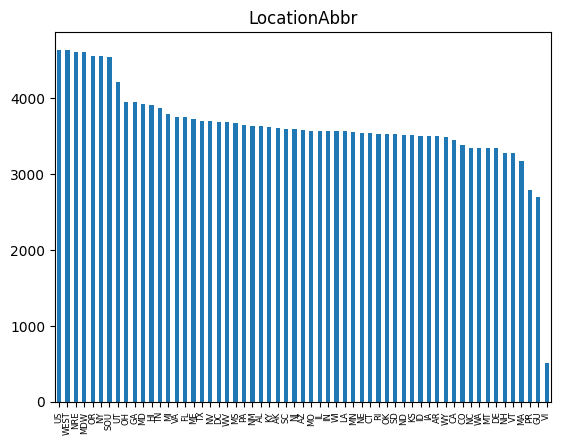

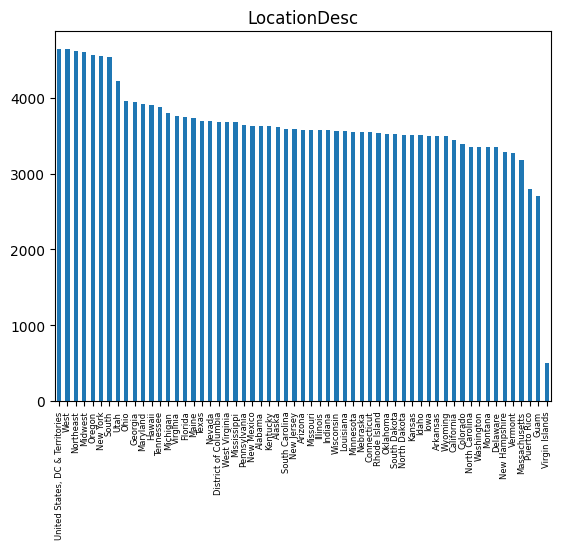

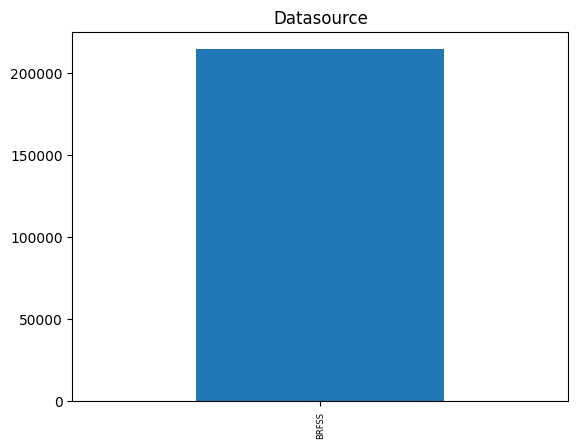

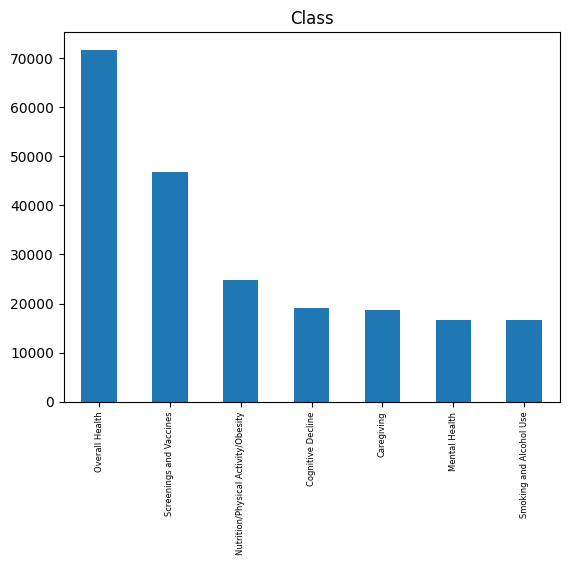

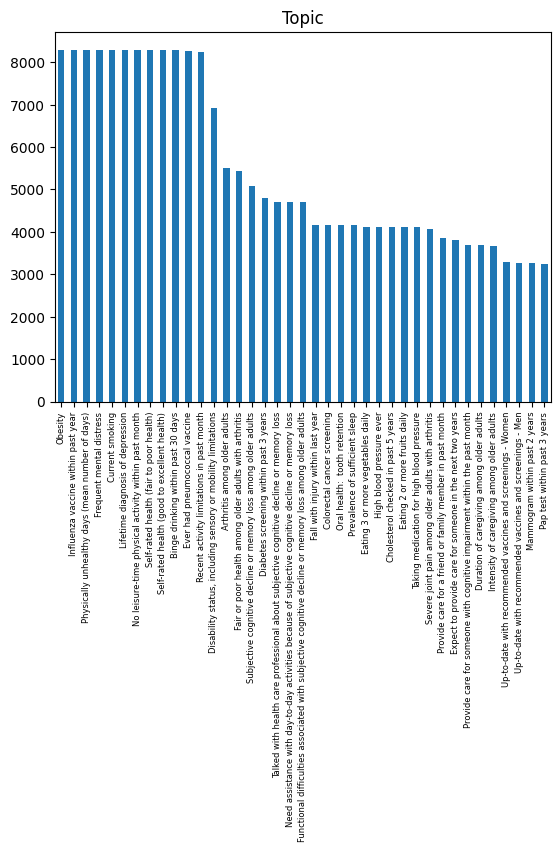

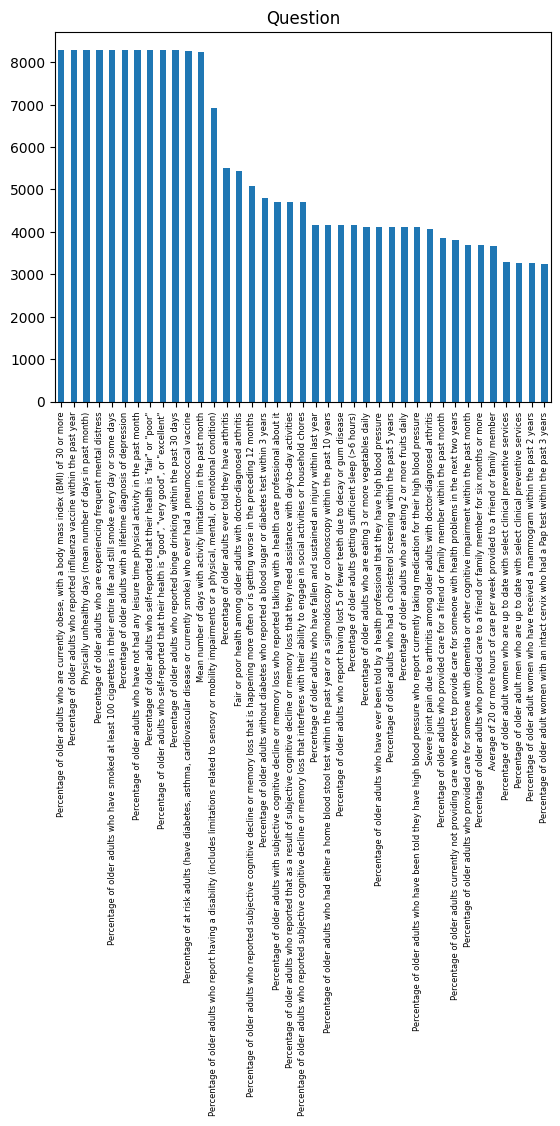

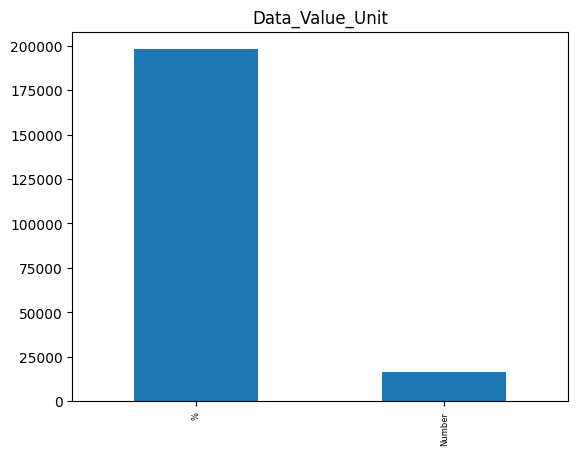

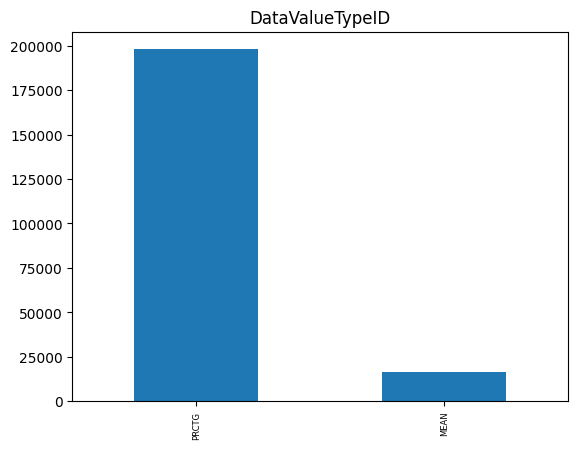

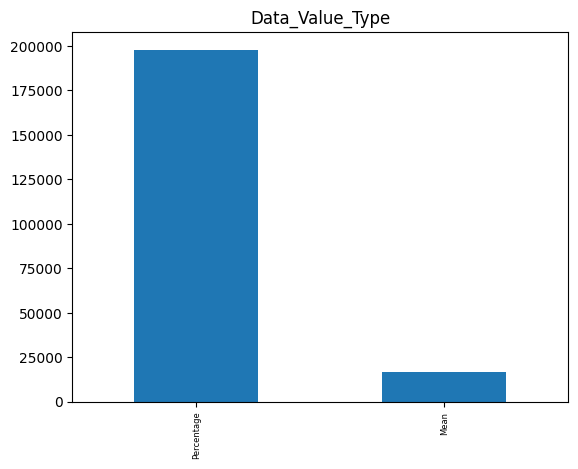

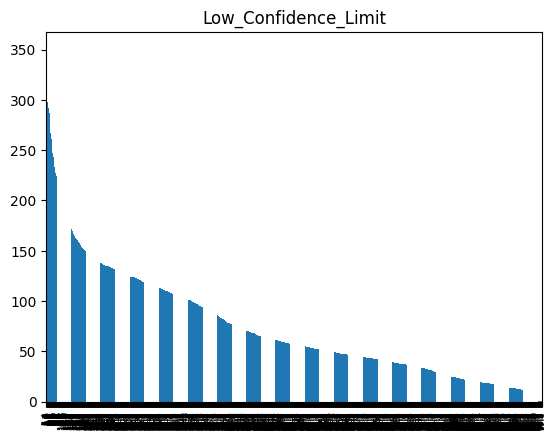

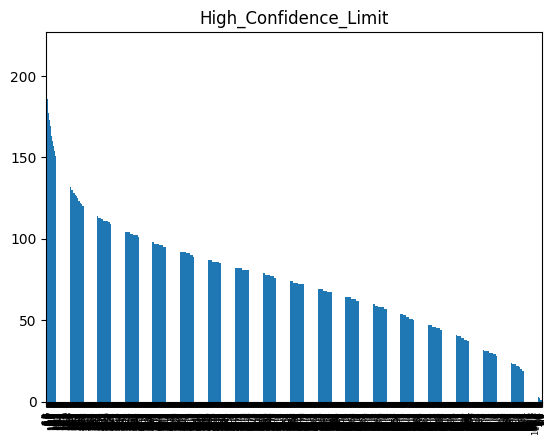

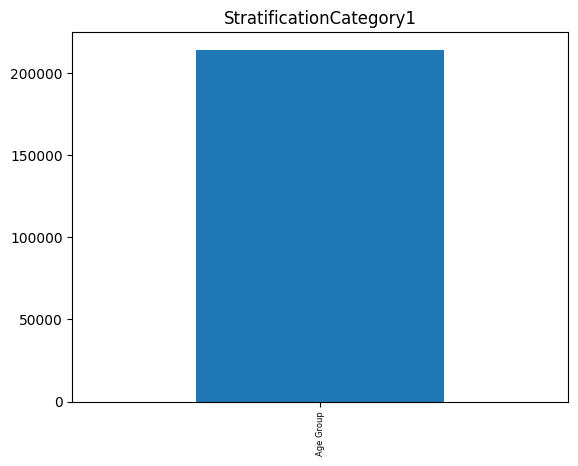

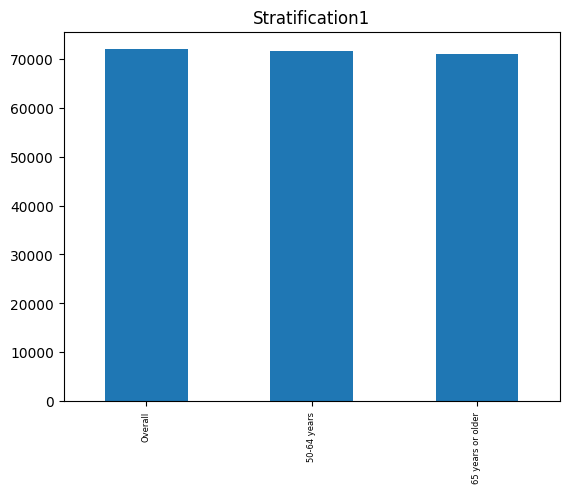

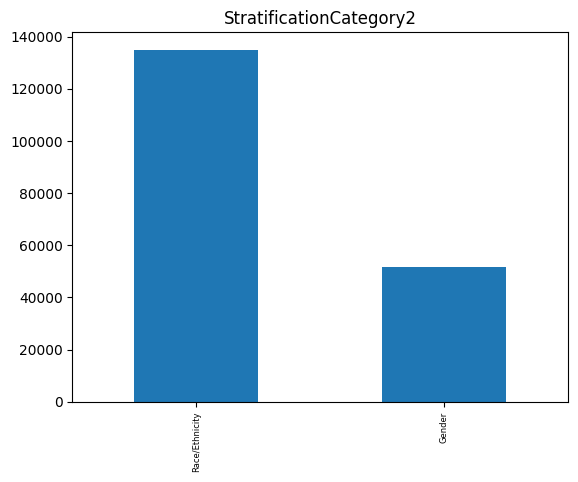

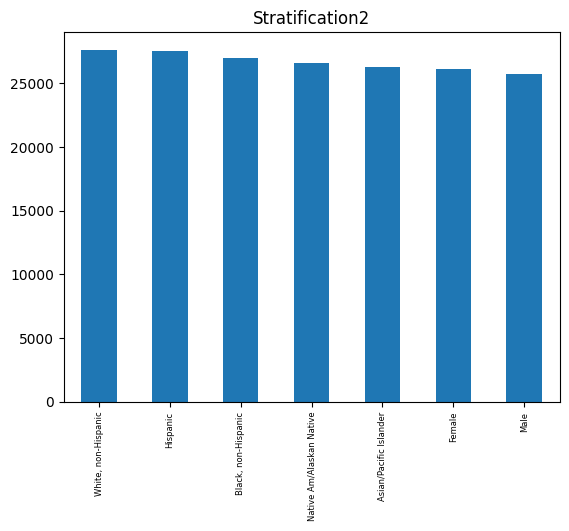

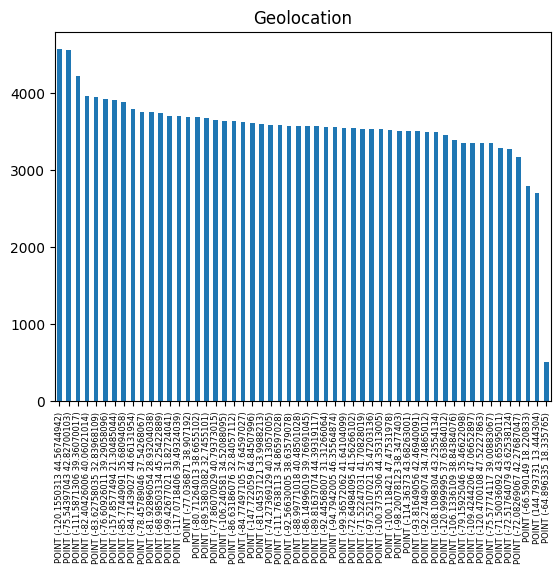

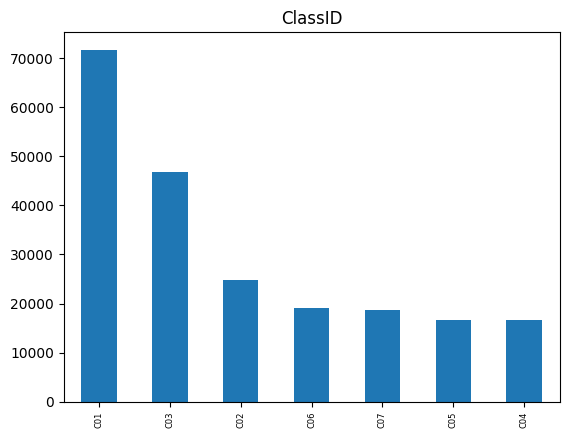

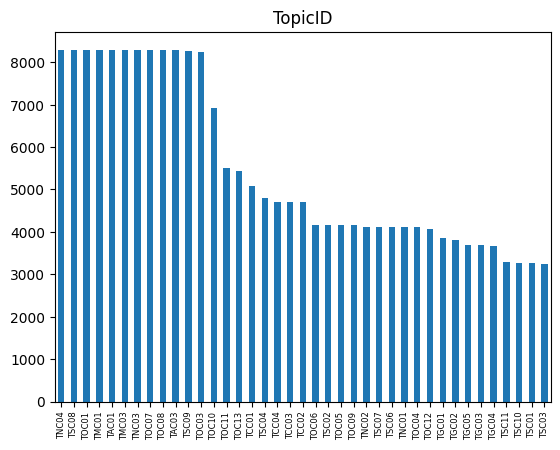

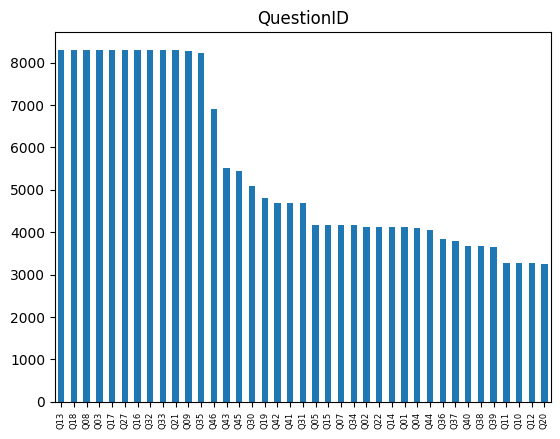

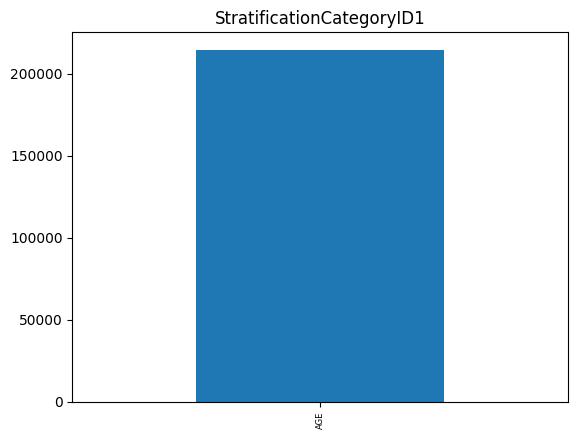

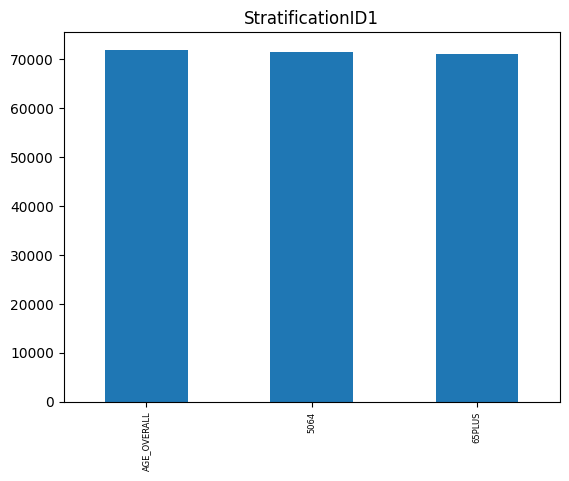

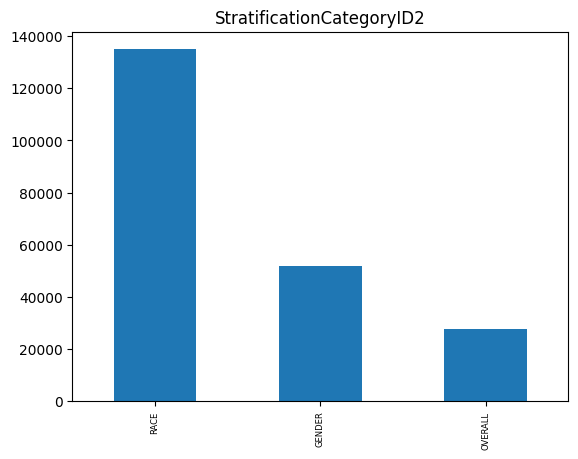

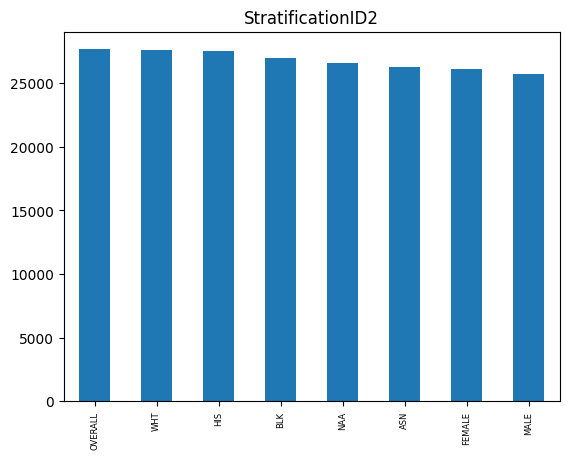

In [9]:
for column in object_columns:
    df[f'{column}'].value_counts().plot(kind="bar", title=f"{column}")
    plt.tick_params(axis='x', labelsize=6) 
    # plt.xticks(rotation=45)
    plt.show()

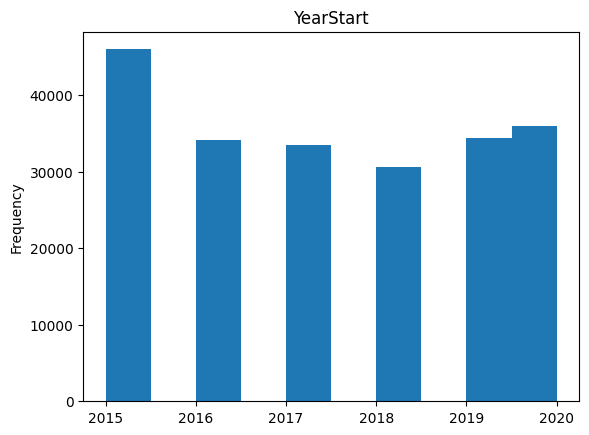

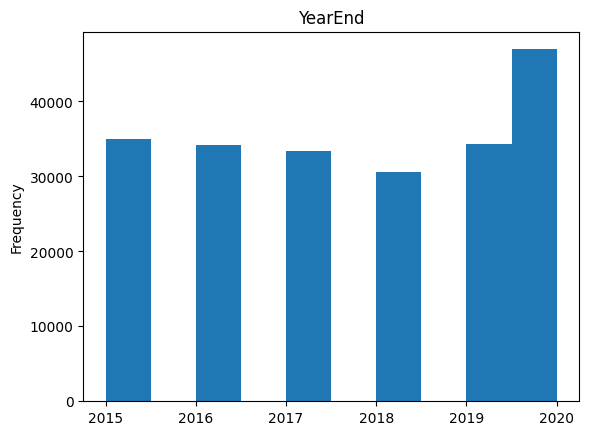

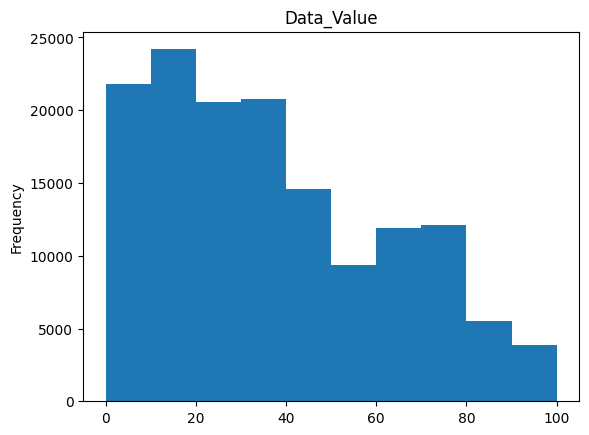

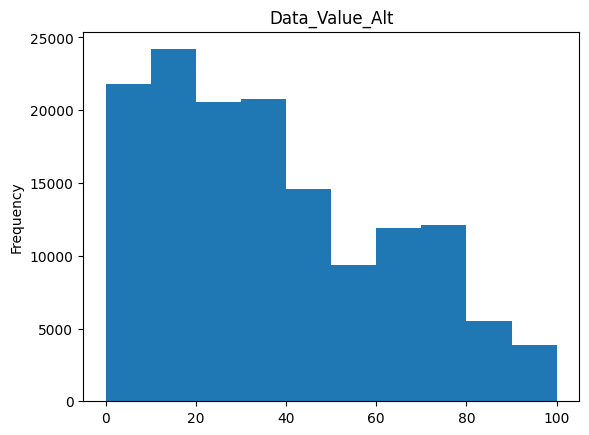

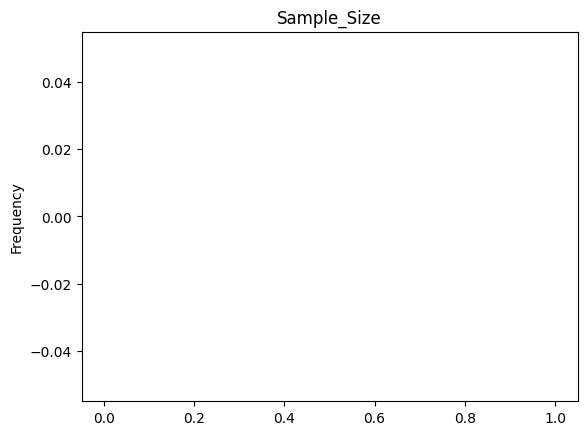

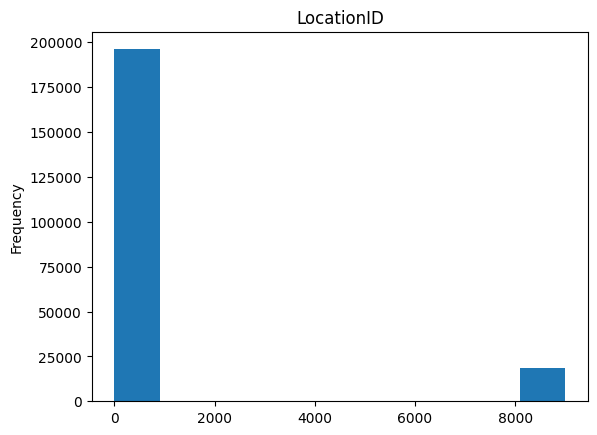

In [10]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in num_columns:
    df[f'{column}'].plot(kind="hist", title=f"{column}")
    plt.show()

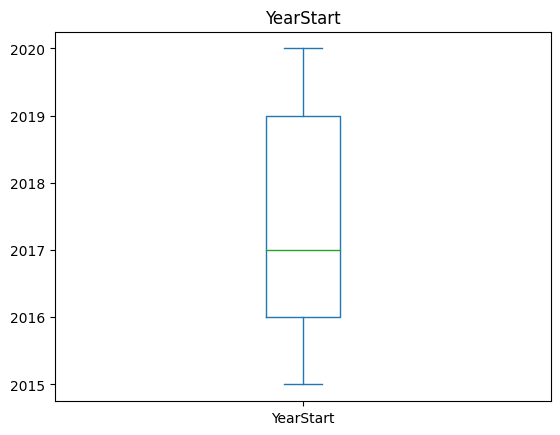

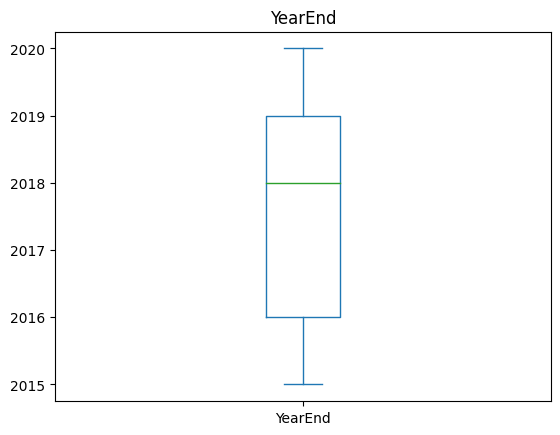

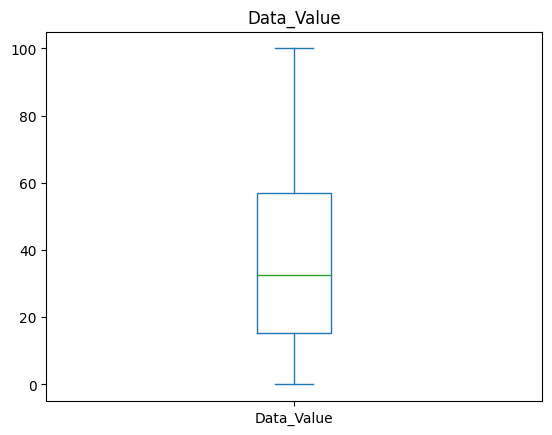

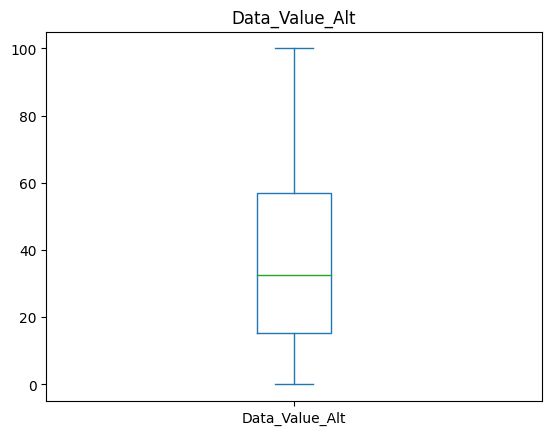

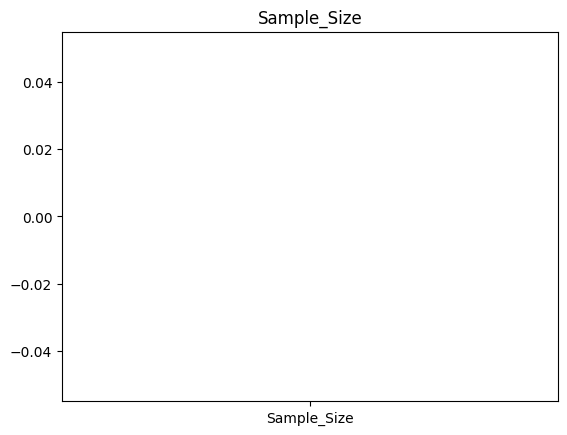

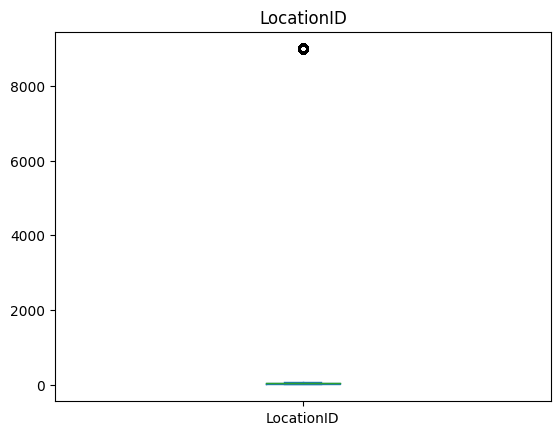

In [11]:
for column in num_columns:
    df[f'{column}'].plot(kind="box", title=f"{column}")
    plt.show()

由图中可以看出，`YearStart`和`YearEnd`两个属性无离群值。`Data_Value`和`Data_Value_Alt`数据分布具有相似性，可以看出该两组属性高度相关，甚至有理由认为它们表示的是同一种数据内容。`Sample_Size`数据属性无内容。`LocationID`有一个明显的离群点。

### 2. 数据缺失的处理

`Sample_Size`列无数据，整列删除。

In [12]:
df = df.drop('Sample_Size', axis=1)

获取缺失数据的属性

In [13]:
na_columns = df.loc[:, (df.isnull().any())].columns
na_columns

Index(['Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'StratificationCategory2', 'Stratification2',
       'Geolocation'],
      dtype='object')

1. 将缺失部分剔除

In [14]:
df_dropna_1 = df.copy()
df_dropna_1 = df_dropna_1.dropna()
df_dropna_1

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
8,2019,2019,IA,Iowa,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,Hispanic,POINT (-93.81649056 42.46940091),C01,TOC11,Q43,19,AGE,5064,RACE,HIS
11,2019,2019,KS,Kansas,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,...,Hispanic,POINT (-98.20078123 38.3477403),C05,TMC01,Q03,20,AGE,AGE_OVERALL,RACE,HIS
15,2017,2017,KY,Kentucky,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,MEAN,...,Male,POINT (-84.77497105 37.64597027),C01,TOC03,Q35,21,AGE,AGE_OVERALL,GENDER,MALE
18,2020,2020,ME,Maine,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,PRCTG,...,Female,POINT (-68.98503134 45.25422889),C01,TOC13,Q45,23,AGE,AGE_OVERALL,GENDER,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214447,2019,2019,WY,Wyoming,BRFSS,Nutrition/Physical Activity/Obesity,No leisure-time physical activity within past ...,Percentage of older adults who have not had an...,%,PRCTG,...,Male,POINT (-108.1098304 43.23554134),C02,TNC03,Q16,56,AGE,5064,GENDER,MALE
214448,2016,2016,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,"White, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,65PLUS,RACE,WHT
214449,2019,2019,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,Female,POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,65PLUS,GENDER,FEMALE
214452,2016,2016,WY,Wyoming,BRFSS,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,%,PRCTG,...,Female,POINT (-108.1098304 43.23554134),C01,TOC08,Q33,56,AGE,AGE_OVERALL,GENDER,FEMALE


2. 用最高频率值来填补缺失值

In [15]:
df_dropna_2 = df.copy()
most_frequent_value = [df_dropna_2[f'{column}'].value_counts().idxmax() for column in na_columns]
[df_dropna_2[f'{column}'].fillna(value, inplace=True) for column, value in zip(na_columns, most_frequent_value)]
df_dropna_2

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,"White, non-Hispanic",POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,"White, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,"White, non-Hispanic",POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,"White, non-Hispanic",POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,"Black, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,5064,RACE,BLK
214458,2015,2015,WY,Wyoming,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,PRCTG,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C04,TAC01,Q17,56,AGE,65PLUS,RACE,ASN
214459,2017,2017,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,NAA
214460,2016,2016,WY,Wyoming,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,PRCTG,...,"White, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC06,Q05,56,AGE,5064,OVERALL,OVERALL


3. 通过属性的相关关系来填补缺失值

In [16]:
# 将标称数据转化为数值数据
df_dropna_3 = df.copy()
df_dropna_3['Low_Confidence_Limit'] = pd.to_numeric(df_dropna_3['Low_Confidence_Limit'], errors='coerce')
df_dropna_3['High_Confidence_Limit'] = pd.to_numeric(df_dropna_3['High_Confidence_Limit'], errors='coerce')

In [17]:
# 通过计算相关性矩阵判断各列之间的相关关系
corr_matrix = df_dropna_3.corr()
corr_matrix

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
YearStart,1.000000,0.808550,0.040190,0.040190,0.043679,0.035203,0.006805
YearEnd,0.808550,1.000000,0.010573,0.010573,0.002832,0.018413,0.003154
Data_Value,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,-0.012051
Data_Value_Alt,0.040190,0.010573,1.000000,1.000000,0.983967,0.983857,-0.012051
Low_Confidence_Limit,0.043679,0.002832,0.983967,0.983967,1.000000,0.939058,-0.024691
High_Confidence_Limit,0.035203,0.018413,0.983857,0.983857,0.939058,1.000000,0.011631
LocationID,0.006805,0.003154,-0.012051,-0.012051,-0.024691,0.011631,1.000000


In [18]:
# 选择出与缺失列相关性最高列
for column in na_columns[:4]:
    highest_corr = corr_matrix[column].sort_values(ascending=False).index[1]
    df_dropna_3[column].fillna(df_dropna_3[highest_corr].mean(), inplace=True)
df_dropna_3

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,"Black, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,5064,RACE,BLK
214458,2015,2015,WY,Wyoming,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,PRCTG,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C04,TAC01,Q17,56,AGE,65PLUS,RACE,ASN
214459,2017,2017,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,NAA
214460,2016,2016,WY,Wyoming,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,PRCTG,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC06,Q05,56,AGE,5064,OVERALL,OVERALL


4. 通过数据对象之间的相似性来填补缺失值

这里用缺失值所在列的其他值来代表缺失值。对于数值属性使用均值填补；对于标称属性使用众数填补。

In [19]:
df_dropna_4 = df.copy()
df_dropna_4['Low_Confidence_Limit'] = pd.to_numeric(df_dropna_4['Low_Confidence_Limit'], errors='coerce')
df_dropna_4['High_Confidence_Limit'] = pd.to_numeric(df_dropna_4['High_Confidence_Limit'], errors='coerce')
for column in na_columns[:4]:
    df_dropna_4[column].fillna(df_dropna_4[column].mean(), inplace=True)

for column in na_columns[4:]:
    df_dropna_4[column].fillna(df_dropna_4[column].mode().iloc[0], inplace=True)

### 比较处理缺失值后数据集的差异

在此，通过数据摘要的形式对处理前后的数据集进行比较。并且罗列了处理前后的缺失值。

In [20]:
df.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,LocationID
count,214462.000000,214462.000000,144629.000000,144629.000000,214462.000000
mean,2017.378477,2017.634000,37.341956,37.341956,800.987821
std,1.779822,1.778926,25.183017,25.183017,2512.934094
min,2015.000000,2015.000000,0.000000,0.000000,1.000000
25%,2016.000000,2016.000000,15.300000,15.300000,18.000000
50%,2017.000000,2018.000000,32.500000,32.500000,33.000000
75%,2019.000000,2019.000000,56.800000,56.800000,49.000000
max,2020.000000,2020.000000,100.000000,100.000000,9004.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

In [22]:
missing_values_count_df = df.isna().sum()
missing_values_count_df

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                   69833
Data_Value_Alt               69833
Low_Confidence_Limit         69990
High_Confidence_Limit        69990
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      27669
Stratification2              27669
Geolocation                  23049
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategoryID1        0
StratificationID1                0
StratificationCategoryID2        0
StratificationID2                0
dtype: int64

In [23]:
missing_values_count_1 = df_dropna_1.isna().sum()
missing_values_count_1

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Unit              0
DataValueTypeID              0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
StratificationCategory1      0
Stratification1              0
StratificationCategory2      0
Stratification2              0
Geolocation                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryID1    0
StratificationID1            0
StratificationCategoryID2    0
StratificationID2            0
dtype: int64

In [24]:
df_dropna_1.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,LocationID
count,97238.000000,97238.000000,97238.000000,97238.000000,97238.000000
mean,2017.393766,2017.604743,37.663025,37.663025,29.681966
std,1.765871,1.765960,25.306987,25.306987,16.776706
min,2015.000000,2015.000000,1.000000,1.000000,1.000000
25%,2016.000000,2016.000000,15.500000,15.500000,16.000000
50%,2017.000000,2018.000000,32.900000,32.900000,29.000000
75%,2019.000000,2019.000000,57.400000,57.400000,42.000000
max,2020.000000,2020.000000,99.900000,99.900000,78.000000


In [25]:
missing_values_count_2 = df_dropna_2.isna().sum()
missing_values_count_2

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Unit              0
DataValueTypeID              0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
StratificationCategory1      0
Stratification1              0
StratificationCategory2      0
Stratification2              0
Geolocation                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryID1    0
StratificationID1            0
StratificationCategoryID2    0
StratificationID2            0
dtype: int64

In [26]:
df_dropna_2.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,LocationID
count,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000
mean,2017.378477,2017.634000,27.136405,27.136405,800.987821
std,1.779822,1.778926,25.365139,25.365139,2512.934094
min,2015.000000,2015.000000,0.000000,0.000000,1.000000
25%,2016.000000,2016.000000,6.000000,6.000000,18.000000
50%,2017.000000,2018.000000,15.900000,15.900000,33.000000
75%,2019.000000,2019.000000,42.100000,42.100000,49.000000
max,2020.000000,2020.000000,100.000000,100.000000,9004.000000


In [27]:
missing_values_count_3 = df_dropna_3.isna().sum()
missing_values_count_3

YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
Datasource                       0
Class                            0
Topic                            0
Question                         0
Data_Value_Unit                  0
DataValueTypeID                  0
Data_Value_Type                  0
Data_Value                       0
Data_Value_Alt                   0
Low_Confidence_Limit             0
High_Confidence_Limit            0
StratificationCategory1          0
Stratification1                  0
StratificationCategory2      27669
Stratification2              27669
Geolocation                  23049
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategoryID1        0
StratificationID1                0
StratificationCategoryID2        0
StratificationID2                0
dtype: int64

In [28]:
df_dropna_3.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000
mean,2017.378477,2017.634000,37.341956,37.341956,34.240097,40.644070,800.987821
std,1.779822,1.778926,20.680441,20.680441,20.004054,21.602473,2512.934094
min,2015.000000,2015.000000,0.000000,0.000000,0.000000,1.400000,1.000000
25%,2016.000000,2016.000000,23.800000,23.800000,19.100000,28.700000,18.000000
50%,2017.000000,2018.000000,37.341956,37.341956,37.341956,37.341956,33.000000
75%,2019.000000,2019.000000,42.100000,42.100000,37.341956,49.600000,49.000000
max,2020.000000,2020.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


In [29]:
missing_values_count_4 = df_dropna_4.isna().sum()
missing_values_count_4

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
Datasource                   0
Class                        0
Topic                        0
Question                     0
Data_Value_Unit              0
DataValueTypeID              0
Data_Value_Type              0
Data_Value                   0
Data_Value_Alt               0
Low_Confidence_Limit         0
High_Confidence_Limit        0
StratificationCategory1      0
Stratification1              0
StratificationCategory2      0
Stratification2              0
Geolocation                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategoryID1    0
StratificationID1            0
StratificationCategoryID2    0
StratificationID2            0
dtype: int64

In [30]:
df_dropna_4.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000,214462.000000
mean,2017.378477,2017.634000,37.341956,37.341956,32.736785,42.244436,800.987821
std,1.779822,1.778926,20.680441,20.680441,19.887159,21.479810,2512.934094
min,2015.000000,2015.000000,0.000000,0.000000,0.000000,1.400000,1.000000
25%,2016.000000,2016.000000,23.800000,23.800000,19.100000,28.700000,18.000000
50%,2017.000000,2018.000000,37.341956,37.341956,32.736785,42.244436,33.000000
75%,2019.000000,2019.000000,42.100000,42.100000,35.300000,49.600000,49.000000
max,2020.000000,2020.000000,100.000000,100.000000,99.600000,100.000000,9004.000000
